In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sb


# Getting data to a data frame


In [10]:
df = pd.read_csv('Copy_of_sonar_data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Data-Preprocessing and visulaization

In [11]:
df.shape

(208, 61)

In [12]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [15]:
df.corr(numeric_only=True)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [16]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [92]:
X = df.drop(60,axis=1)
Y=df[60]


In [18]:
X.shape

(208, 60)

In [19]:
Y.shape

(208,)

C:\Users\Srimanth\AppData\Local\Temp\ipykernel_18636\2629580087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), cmap="coolwarm", annot=True)


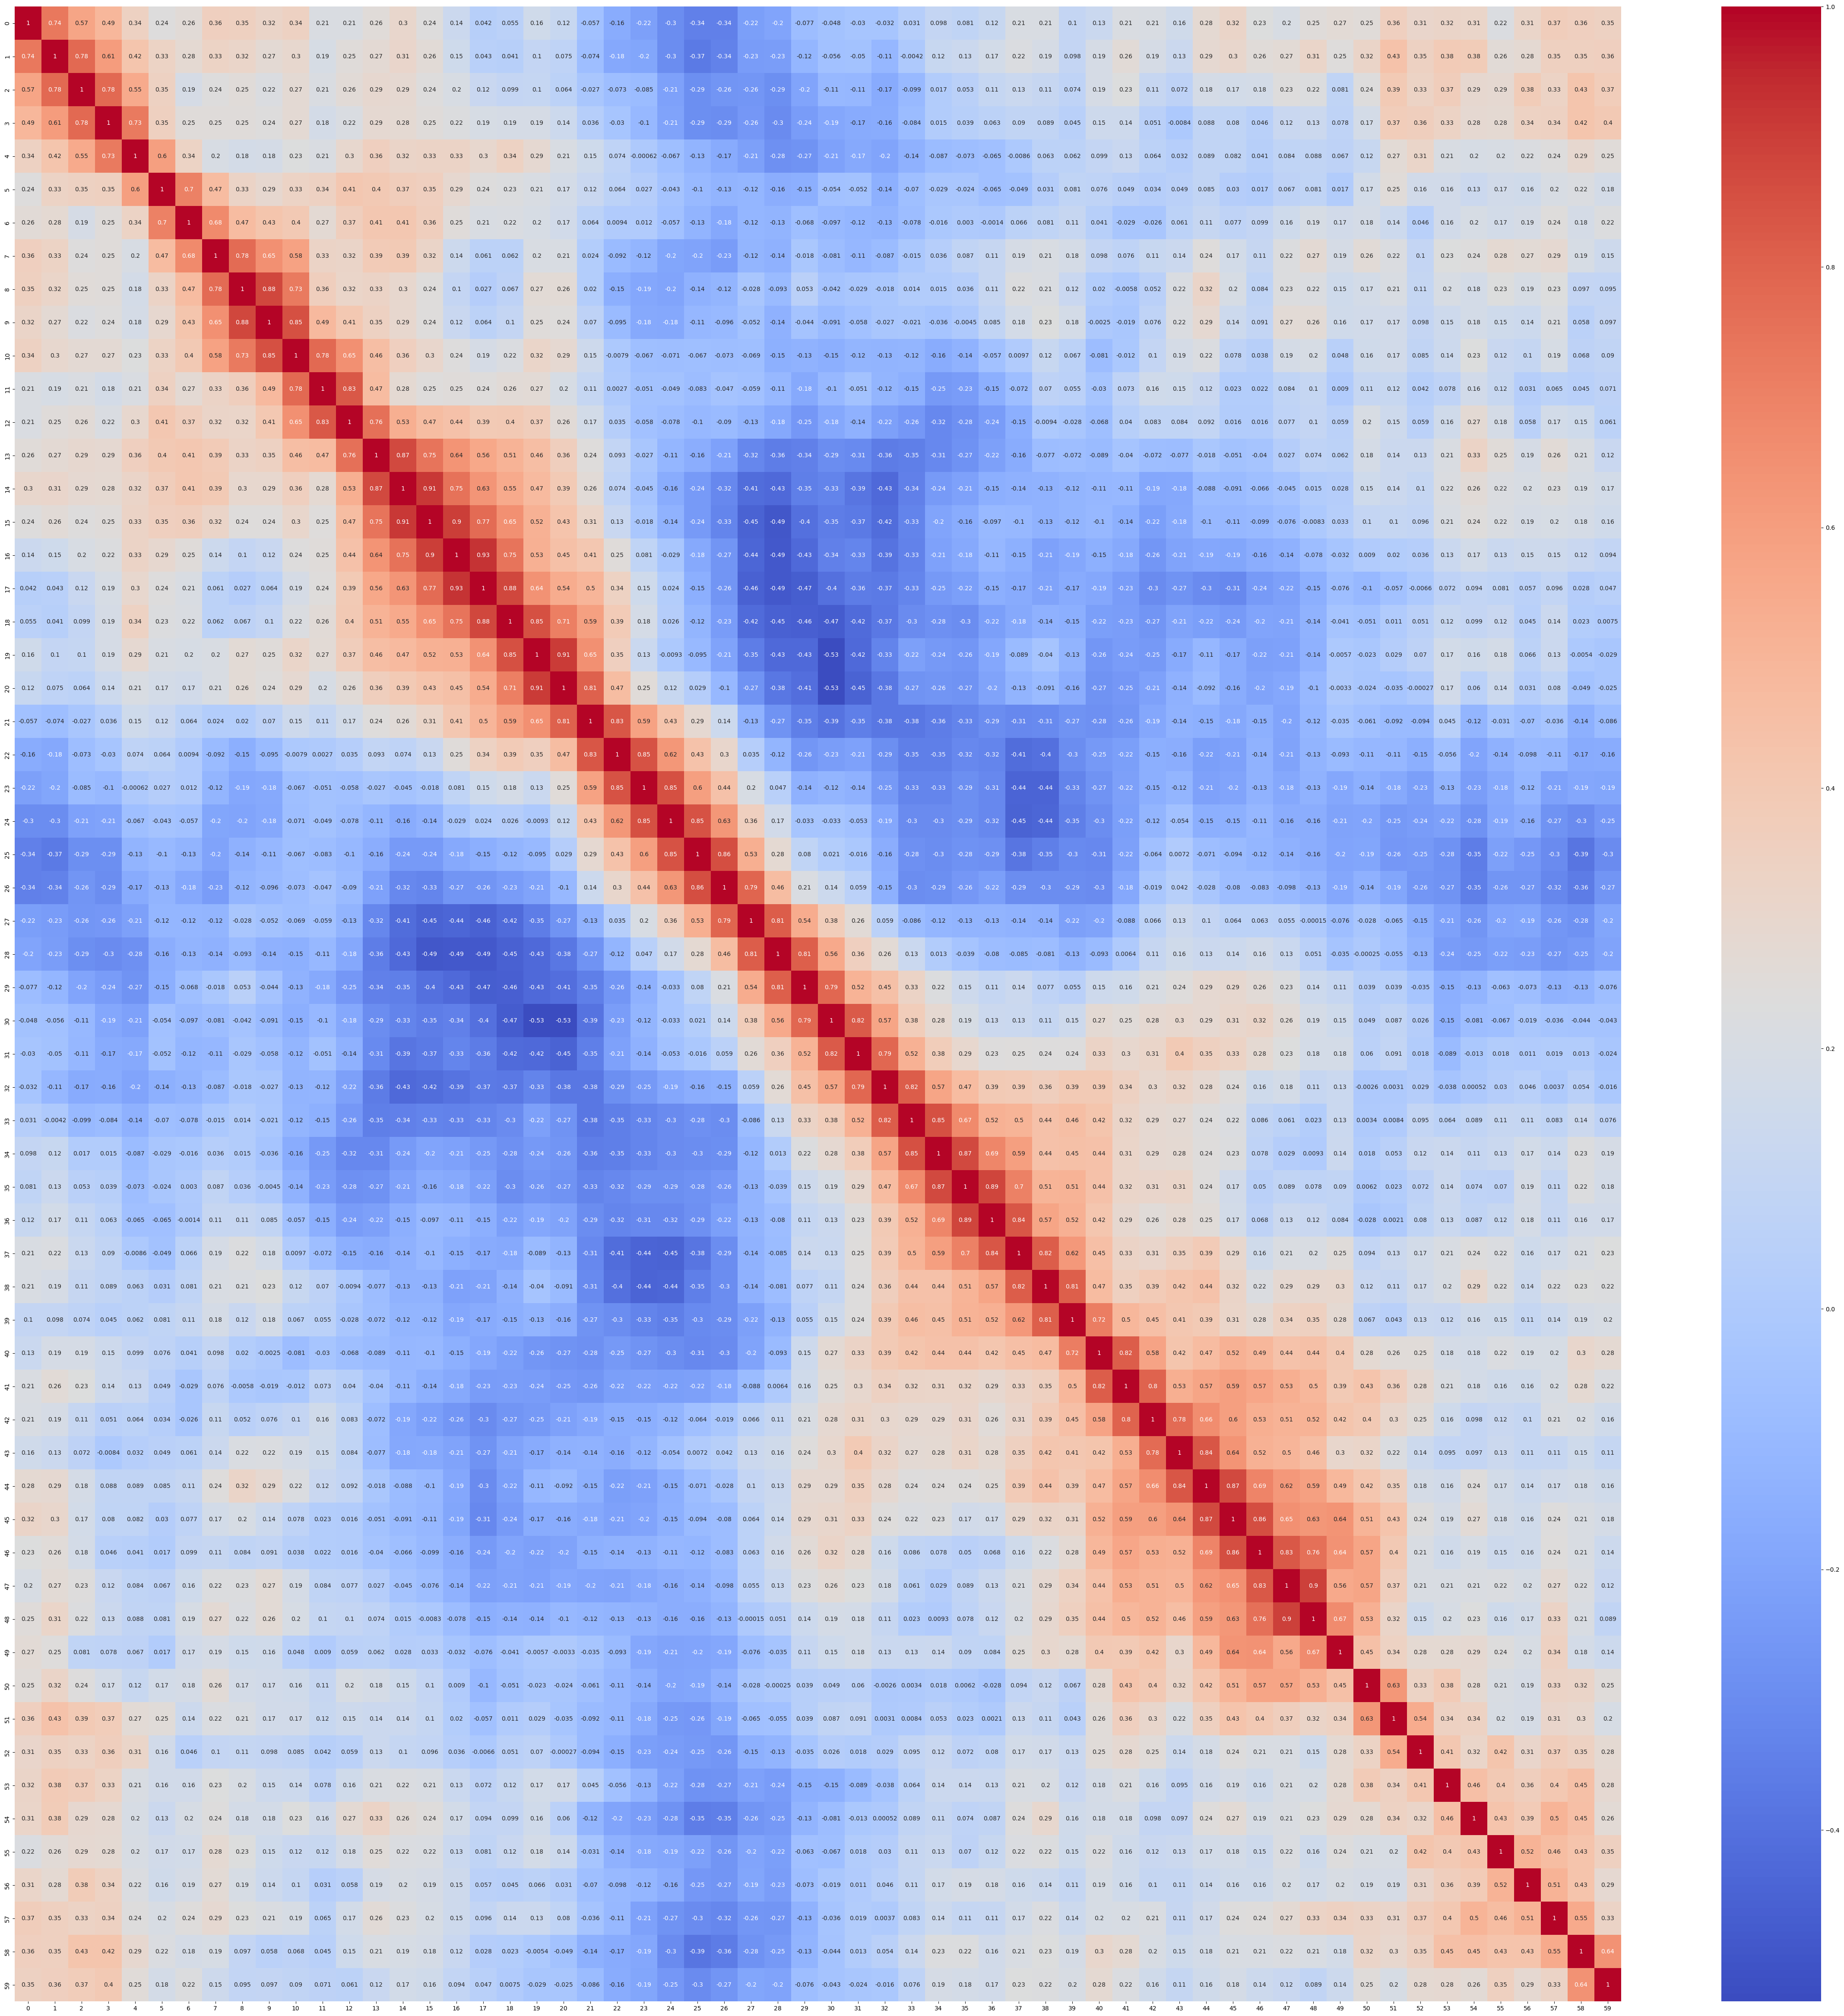

In [23]:

plt.figure(figsize = (60,60))
dataplot = sb.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [25]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# Train test split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [58]:
X_test.shape

(21, 60)

In [59]:
X_train.shape

(187, 60)

In [60]:
log = LogisticRegression()

In [61]:
log.fit(X_train,y_train)

LogisticRegression()

**Need to check whtther the model overfitted or underfitted or it is a balanced fit**

In [62]:
Ytrainhat = log.predict(X_train)

In [63]:
Ytesthat = log.predict(X_test)

In [64]:
training_accuracy = accuracy_score(Ytrainhat,y_train)
test_accuracy = accuracy_score(Ytesthat,y_test)

In [65]:
print(training_accuracy," ",test_accuracy)

0.8128342245989305   0.9047619047619048


# Above we kept a random random_state value so we will comapre accuracy for more random state values

In [93]:
i=0
list=[]
while(i<10):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=i)
    log = LogisticRegression()
    log.fit(X_train,y_train)
    Ytrainhat = log.predict(X_train)
    Ytesthat = log.predict(X_test)
    training_accuracy = accuracy_score(Ytrainhat,y_train)
    test_accuracy = accuracy_score(Ytesthat,y_test)
    list.append([i,training_accuracy,test_accuracy])
    i+=1
print(list)
    
    

[[0, 0.8288770053475936, 0.8095238095238095], [1, 0.8342245989304813, 0.7619047619047619], [2, 0.8128342245989305, 0.9047619047619048], [3, 0.8502673796791443, 0.6190476190476191], [4, 0.839572192513369, 0.8095238095238095], [5, 0.8342245989304813, 0.6190476190476191], [6, 0.839572192513369, 0.7619047619047619], [7, 0.8342245989304813, 0.7619047619047619], [8, 0.8342245989304813, 0.6666666666666666], [9, 0.839572192513369, 0.8095238095238095]]


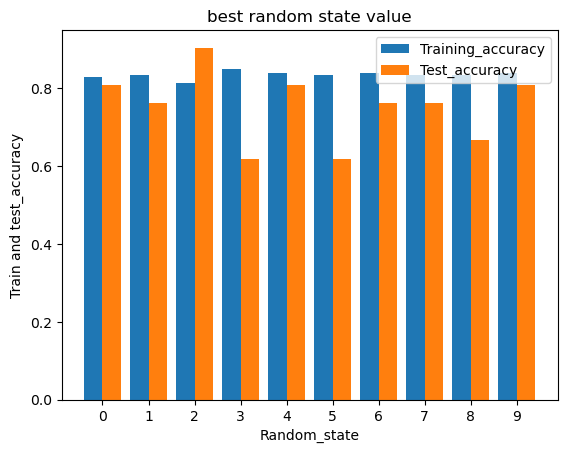

In [95]:
X1 = ['0','1','2','3','4','5','6','7','8','9']
Ytest=[]
Ytrain=[]
for i in range(len(list)):
    Ytrain.append(list[i][1])
    Ytest.append(list[i][2])
X_axis = np.arange(len(X1))
  
plt.bar(X_axis - 0.2, Ytrain, 0.4, label = 'Training_accuracy')
plt.bar(X_axis + 0.2, Ytest, 0.4, label = 'Test_accuracy')
  
plt.xticks(X_axis, X1)
plt.xlabel("Random_state")
plt.ylabel("Train and test_accuracy")
plt.title("best random state value")
plt.legend()
plt.show()

# predicitng value for a new data point 

In [79]:
input_data = [0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
]
array_format = np.asarray(input_data)


In [80]:
array_format

array([0.02  , 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601,
       0.3109, 0.2111, 0.1609, 0.1582, 0.2238, 0.0645, 0.066 , 0.2273,
       0.31  , 0.2999, 0.5078, 0.4797, 0.5783, 0.5071, 0.4328, 0.555 ,
       0.6711, 0.6415, 0.7104, 0.808 , 0.6791, 0.3857, 0.1307, 0.2604,
       0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
       0.051 , 0.2834, 0.2825, 0.4256, 0.2641, 0.1386, 0.1051, 0.1343,
       0.0383, 0.0324, 0.0232, 0.0027, 0.0065, 0.0159, 0.0072, 0.0167,
       0.018 , 0.0084, 0.009 , 0.0032])

In [81]:
array_format = array_format.reshape(1,-1)

In [82]:
prediction = log.predict(array_format)
prediction

array(['R'], dtype=object)